# 1. Basic Analysis

## Libraries

In [1]:
from lib.utils import create_graph, print_graph_data, fit_powerlaw, assortativity_analysis
from lib.visualization import draw_network, draw_sentiment_network
from lib.visualization import plot_dialogues_distribution, plot_loglog_degree_distributions
from lib.visualization import plot_degree_distributions
from lib.visualization import plot_centrality_analysis

from lib.sentiment_analysis import sentiment_heatmap, top_relationships, most_loved_hated, plot_heatmap

from lib.indirect_analysis import create_graph_from_matrix

## Draw networks

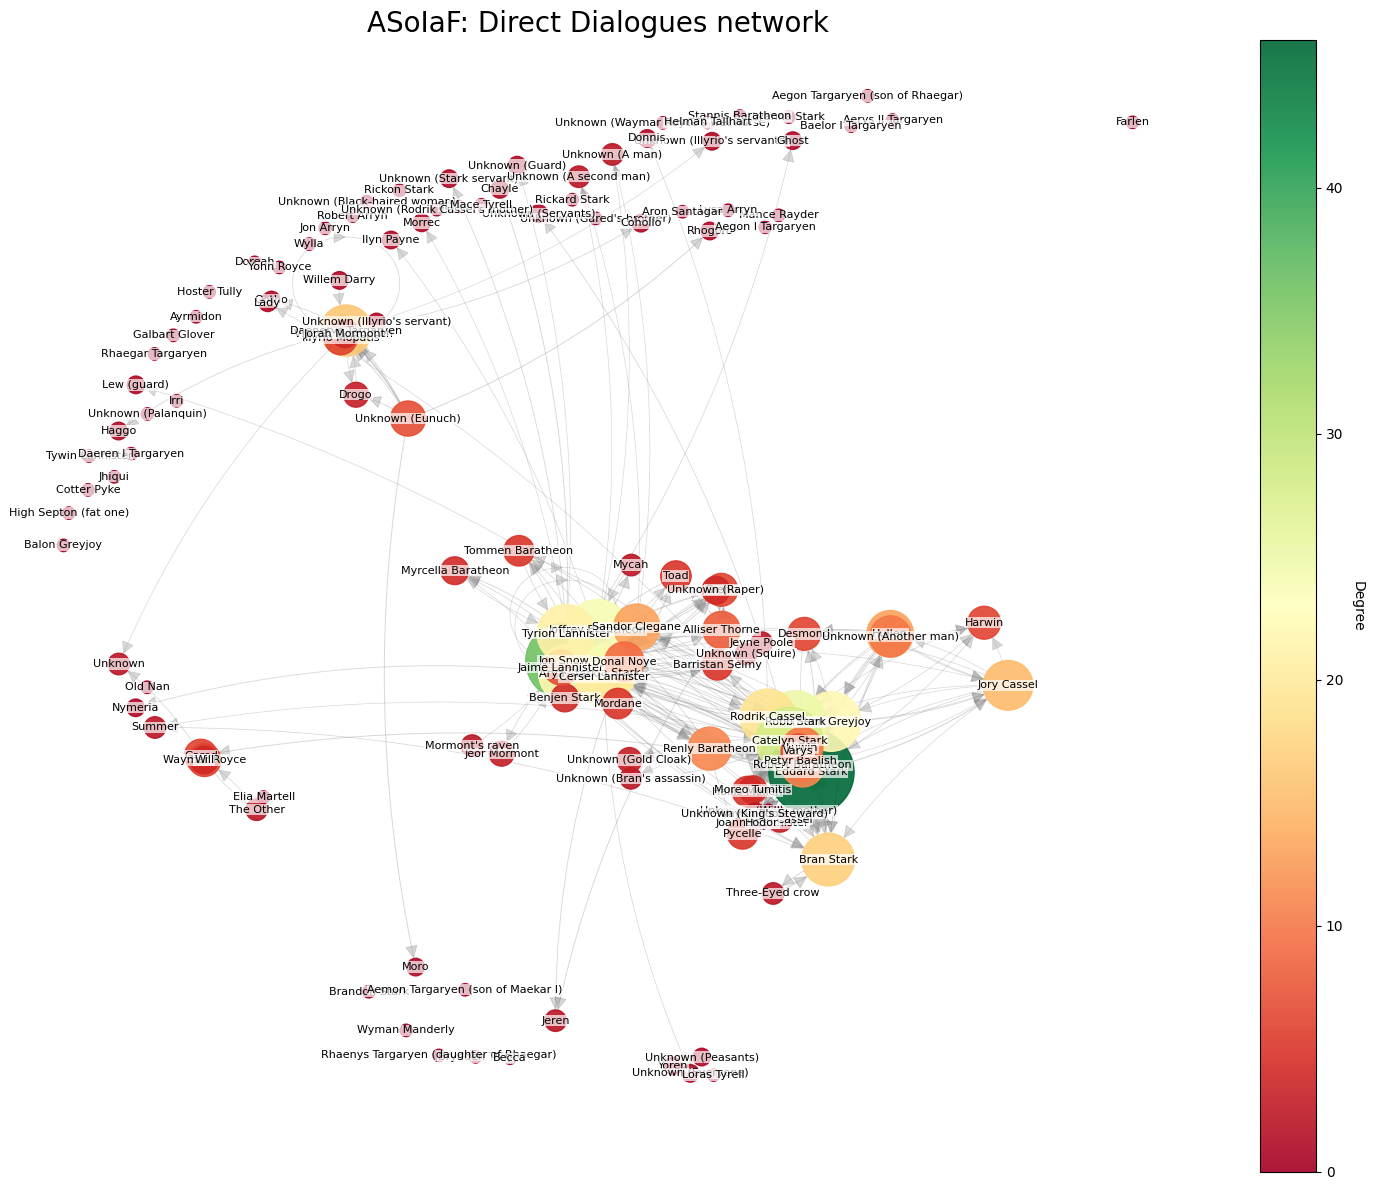

In [2]:
G = create_graph(path_name='data/dialogues.csv', edge_type='direct')
draw_network(G, title="ASoIaF: Direct Dialogues network", file_name="dialogue-direct-network")

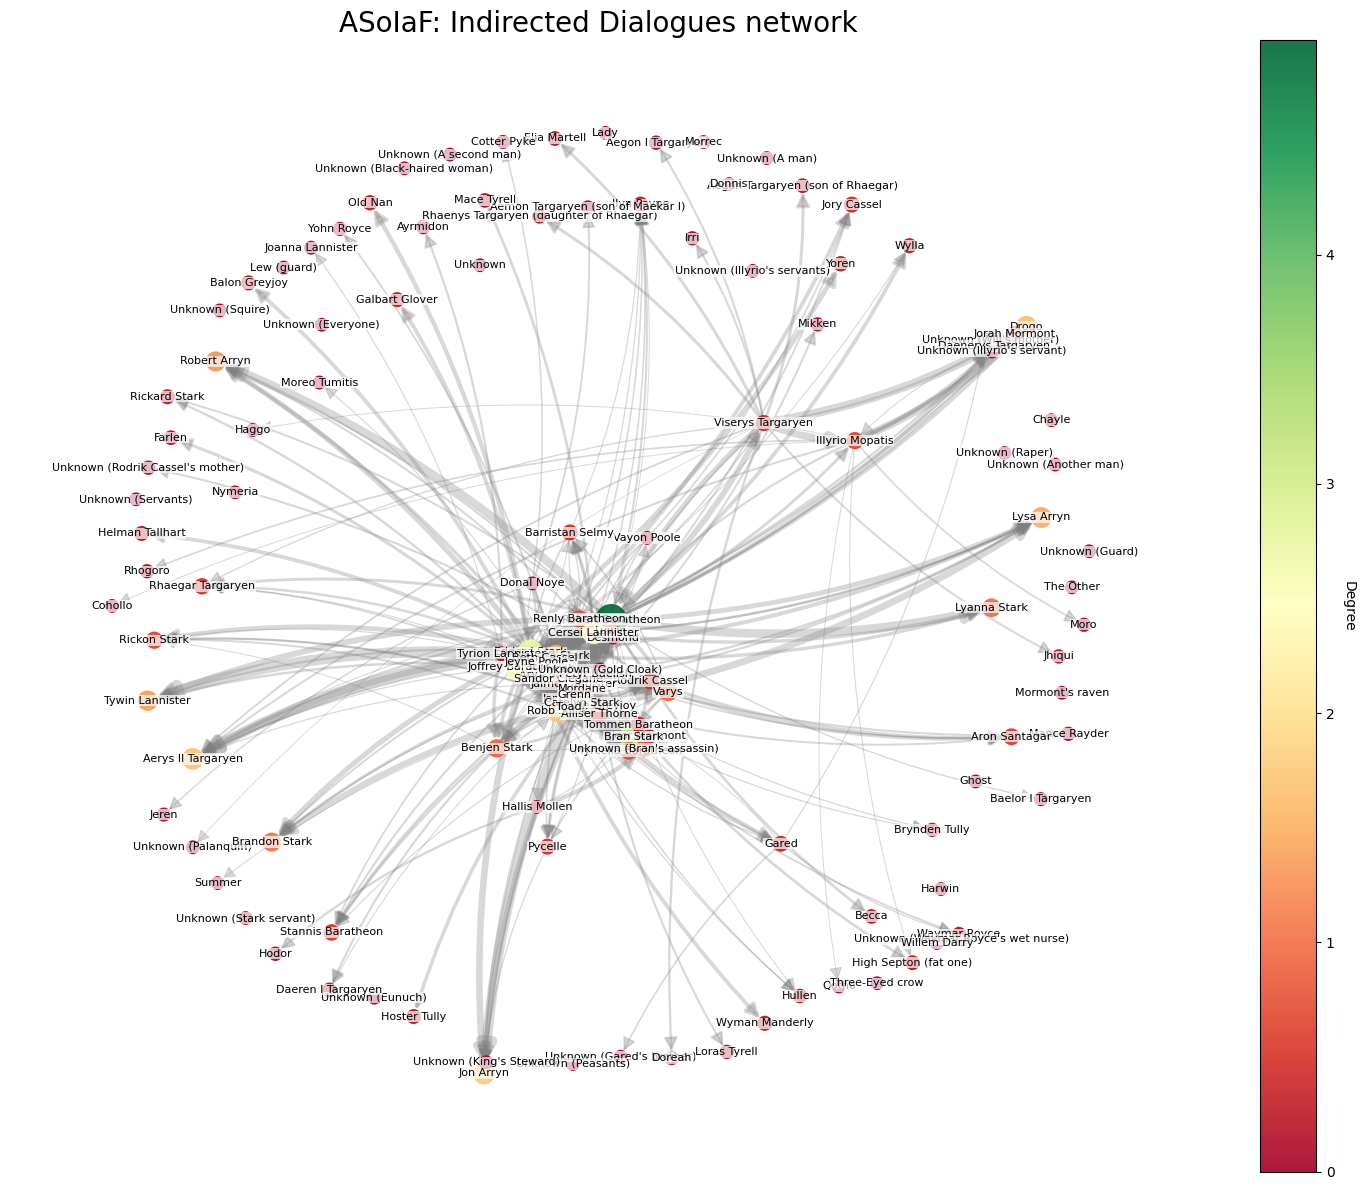

In [3]:
IG = create_graph(path_name='data/dialogues.csv', edge_type='indirect')
draw_network(
    IG,
    node_size_criterion='weighted_in_degree',
    title="ASoIaF: Indirected Dialogues network", 
    file_name="dialogue-indirect-network"
)

## Print basic graph data

In [4]:
print_graph_data(G)

Number of nodes: 133
Number of edges: 303

Min in_degree: 0
Average in_degree: 2.2781954887218046
Max in_degree: 22

Min out_degree: 0
Average out_degree: 2.2781954887218046
Max out_degree: 24

Average weight: 432.85478547854785
Average number of dialogues: 7.617161716171617
Maximum number of dialogues between two characters: 125


## Degree distribution


Dialogue Distribution Statistics:
Min dialogues per directed edge: 1
Max dialogues per directed edge: 125
Mean dialogues per directed edge: 7.62
Median dialogues per directed edge: 3.0
Total directed edges: 303


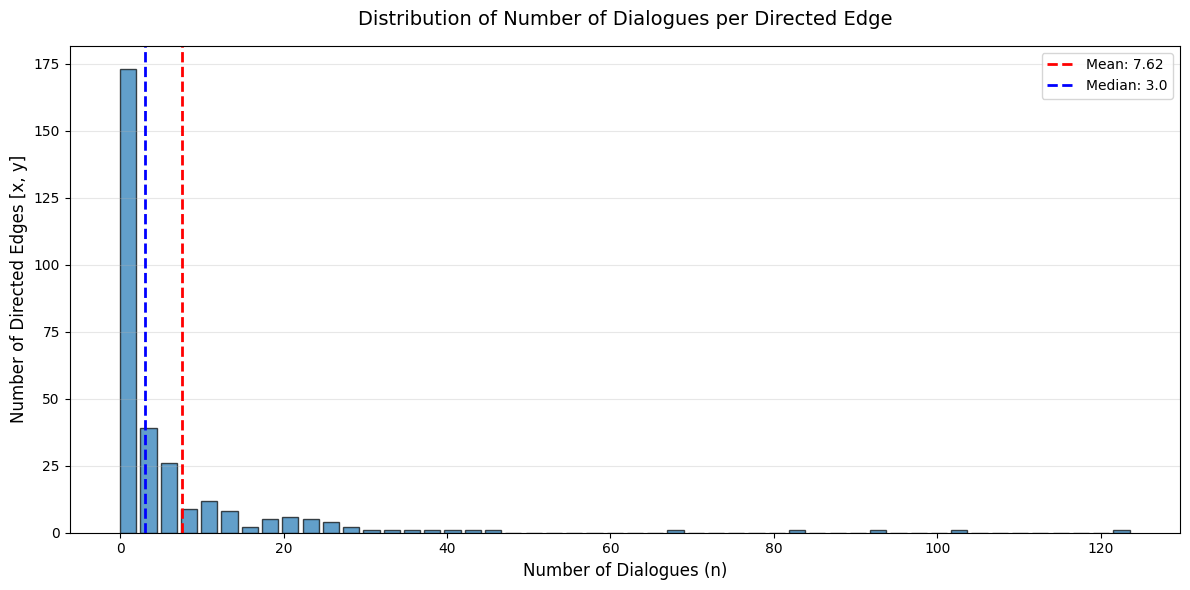

In [5]:
dialogue_counts = plot_dialogues_distribution(G, file_name="dialogue-distribution")

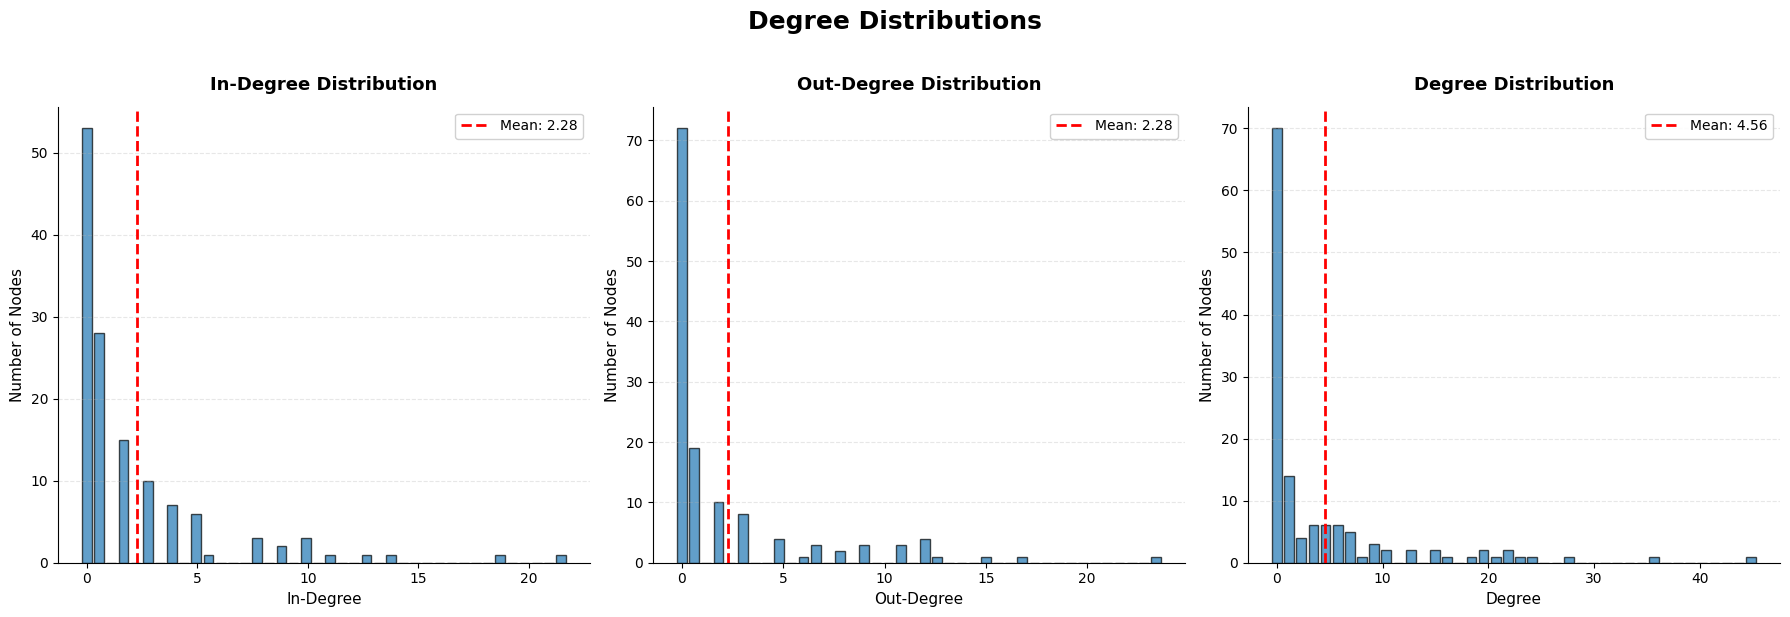

In [6]:
degrees, in_degrees, out_degrees = plot_degree_distributions(G, file_name="degree-distribution")

## Try Fit Powerlaw

In [7]:

print("POWER-LAW EXPONENTS (α) AND FIT RANGE")

alpha_in, x_min_in = fit_powerlaw(in_degrees)
print(f"In-Degree α = {alpha_in:.3f}  (xmin = {x_min_in})")

alpha_out, x_min_out = fit_powerlaw(out_degrees)
print(f"Out-Degree α = {alpha_out:.3f}  (xmin = {x_min_out})")

alpha_total, x_min_total = fit_powerlaw(degrees)
print(f"Total-Degree α = {alpha_total:.3f}  (xmin = {x_min_total})")

alpha_dialogue, x_min_dialogue = fit_powerlaw(dialogue_counts)
print(f"Dialogue-Count α = {alpha_dialogue:.3f}  (xmin = {x_min_dialogue})")


POWER-LAW EXPONENTS (α) AND FIT RANGE
In-Degree α = 1.548  (xmin = 1.0)
Out-Degree α = 1.488  (xmin = 1.0)
Total-Degree α = 1.619  (xmin = 1.0)
Dialogue-Count α = 1.509  (xmin = 1.0)


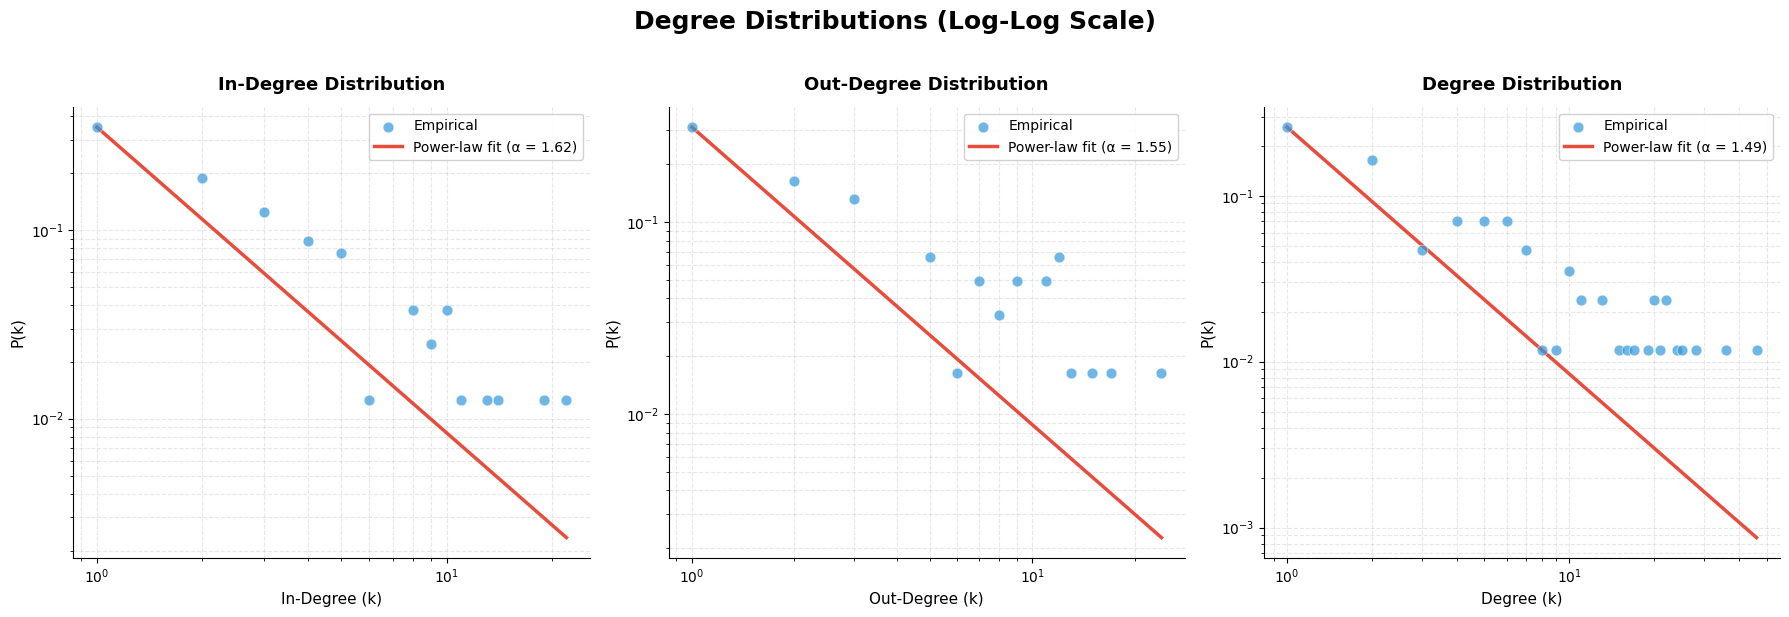

In [8]:
_ = plot_loglog_degree_distributions(G, file_name="loglog-degree-distribution")

## Centrality and Assortativity

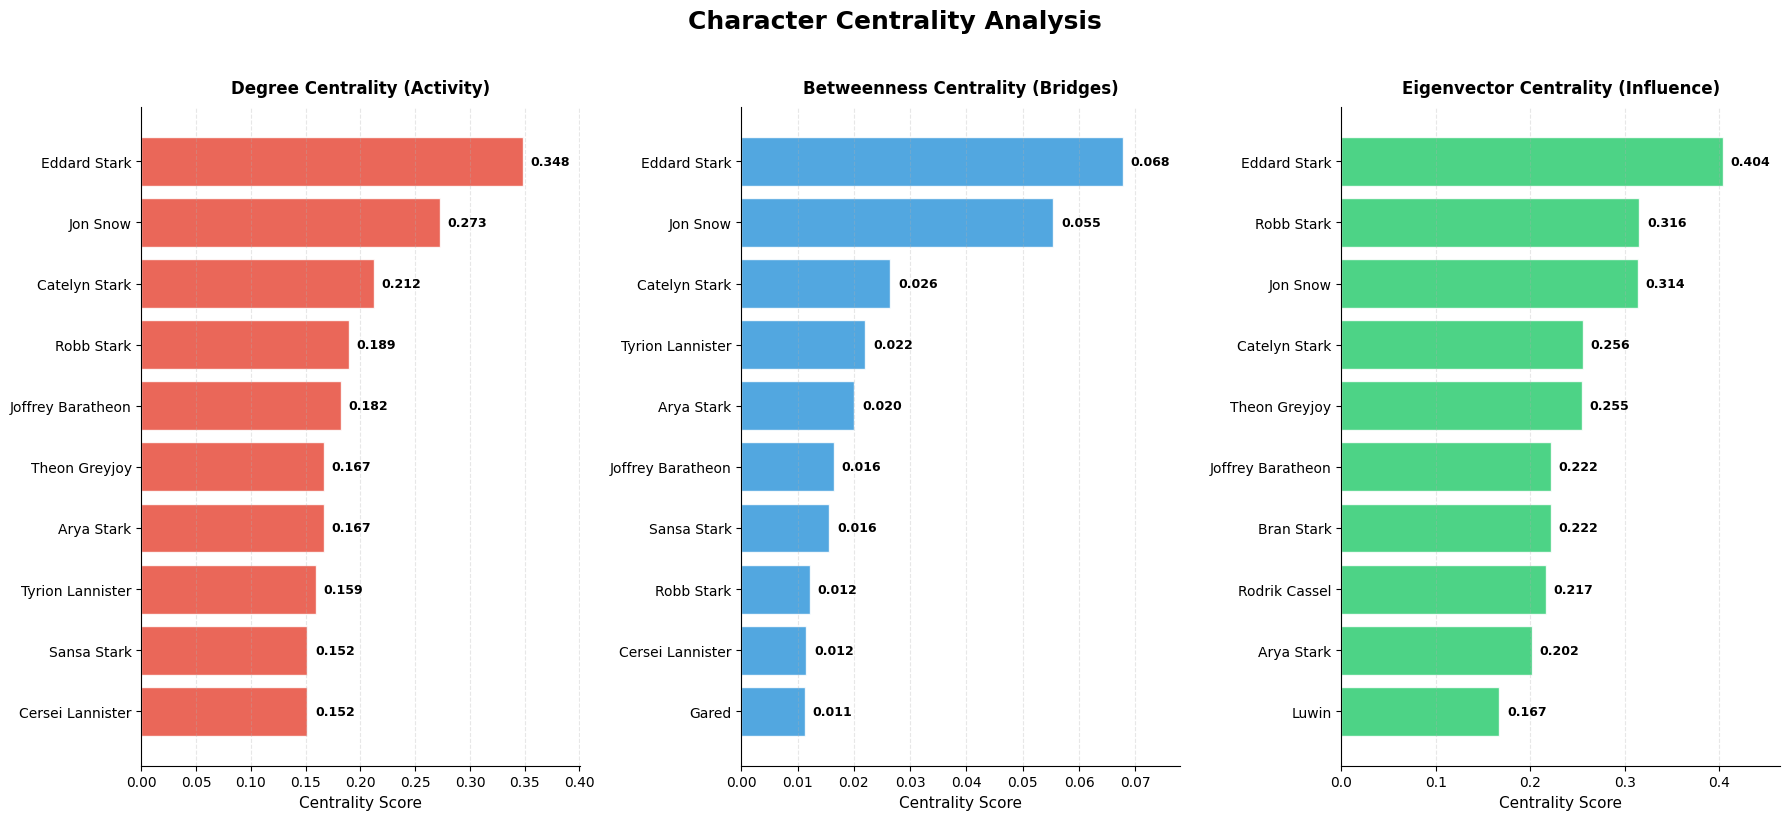

In [9]:
_ = plot_centrality_analysis(G, title="Character Centrality Analysis", file_name="centrality-analysis")

In [10]:
assortativity_analysis(G)

Degree Assortativity Coefficient (r): -0.1150


- - -

# 2. Sentiment Analysis


Extracting dialogues from graph edges...
Extracted 2308 dialogues from graph
Analyzing sentiment for all dialogues...
Global average sentiment score (m): 0.0076
Confidence parameter (C): 7.62 (avg dialogues per pair)


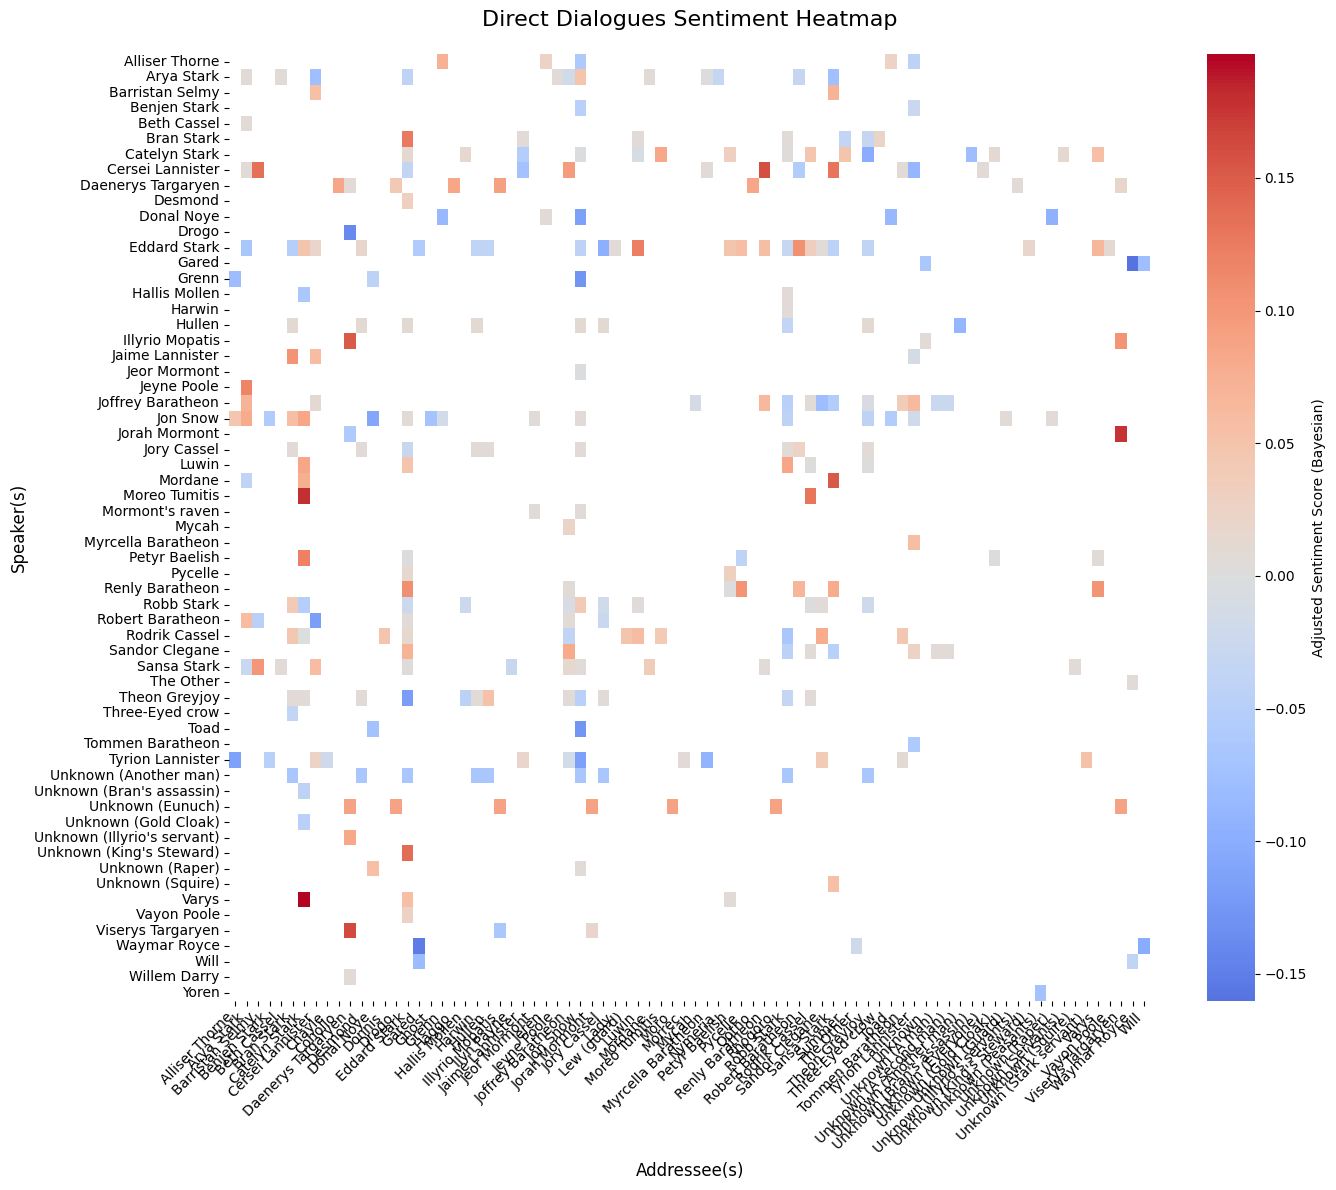

In [11]:
G, dialogue_data, relationship_data = sentiment_heatmap(
    G, 
    remove_empty=True, 
    title="Direct Dialogues Sentiment Heatmap", 
    file_name="sentiment-heatmap"
)

In [12]:
_ = top_relationships(relationship_data, n=10)


Top 10 Positive Relationships (1-way):
1. Varys → Catelyn Stark: 0.1968 (13 dialogues)
2. Moreo Tumitis → Catelyn Stark: 0.1793 (9 dialogues)
3. Jorah Mormont → Viserys Targaryen: 0.1764 (2 dialogues)
4. Viserys Targaryen → Daenerys Targaryen: 0.1629 (38 dialogues)
5. Cersei Lannister → Renly Baratheon: 0.1593 (2 dialogues)
6. Illyrio Mopatis → Daenerys Targaryen: 0.1519 (22 dialogues)
7. Mordane → Sansa Stark: 0.1518 (8 dialogues)
8. Unknown (King's Steward) → Eddard Stark: 0.1378 (4 dialogues)
9. Cersei Lannister → Barristan Selmy: 0.1335 (5 dialogues)
10. Cersei Lannister → Sansa Stark: 0.1304 (3 dialogues)

Top 10 Negative Relationships (1-way):
1. Gared → Waymar Royce: -0.1600 (22 dialogues)
2. Waymar Royce → Gared: -0.1519 (14 dialogues)
3. Drogo → Daenerys Targaryen: -0.1378 (7 dialogues)
4. Grenn → Jon Snow: -0.1276 (2 dialogues)
5. Toad → Jon Snow: -0.1253 (3 dialogues)
6. Theon Greyjoy → Eddard Stark: -0.1193 (4 dialogues)
7. Robert Baratheon → Cersei Lannister: -0.1176 (10 

C:\Users\longo\AppData\Roaming\Python\Python314\site-packages\networkx\drawing\nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


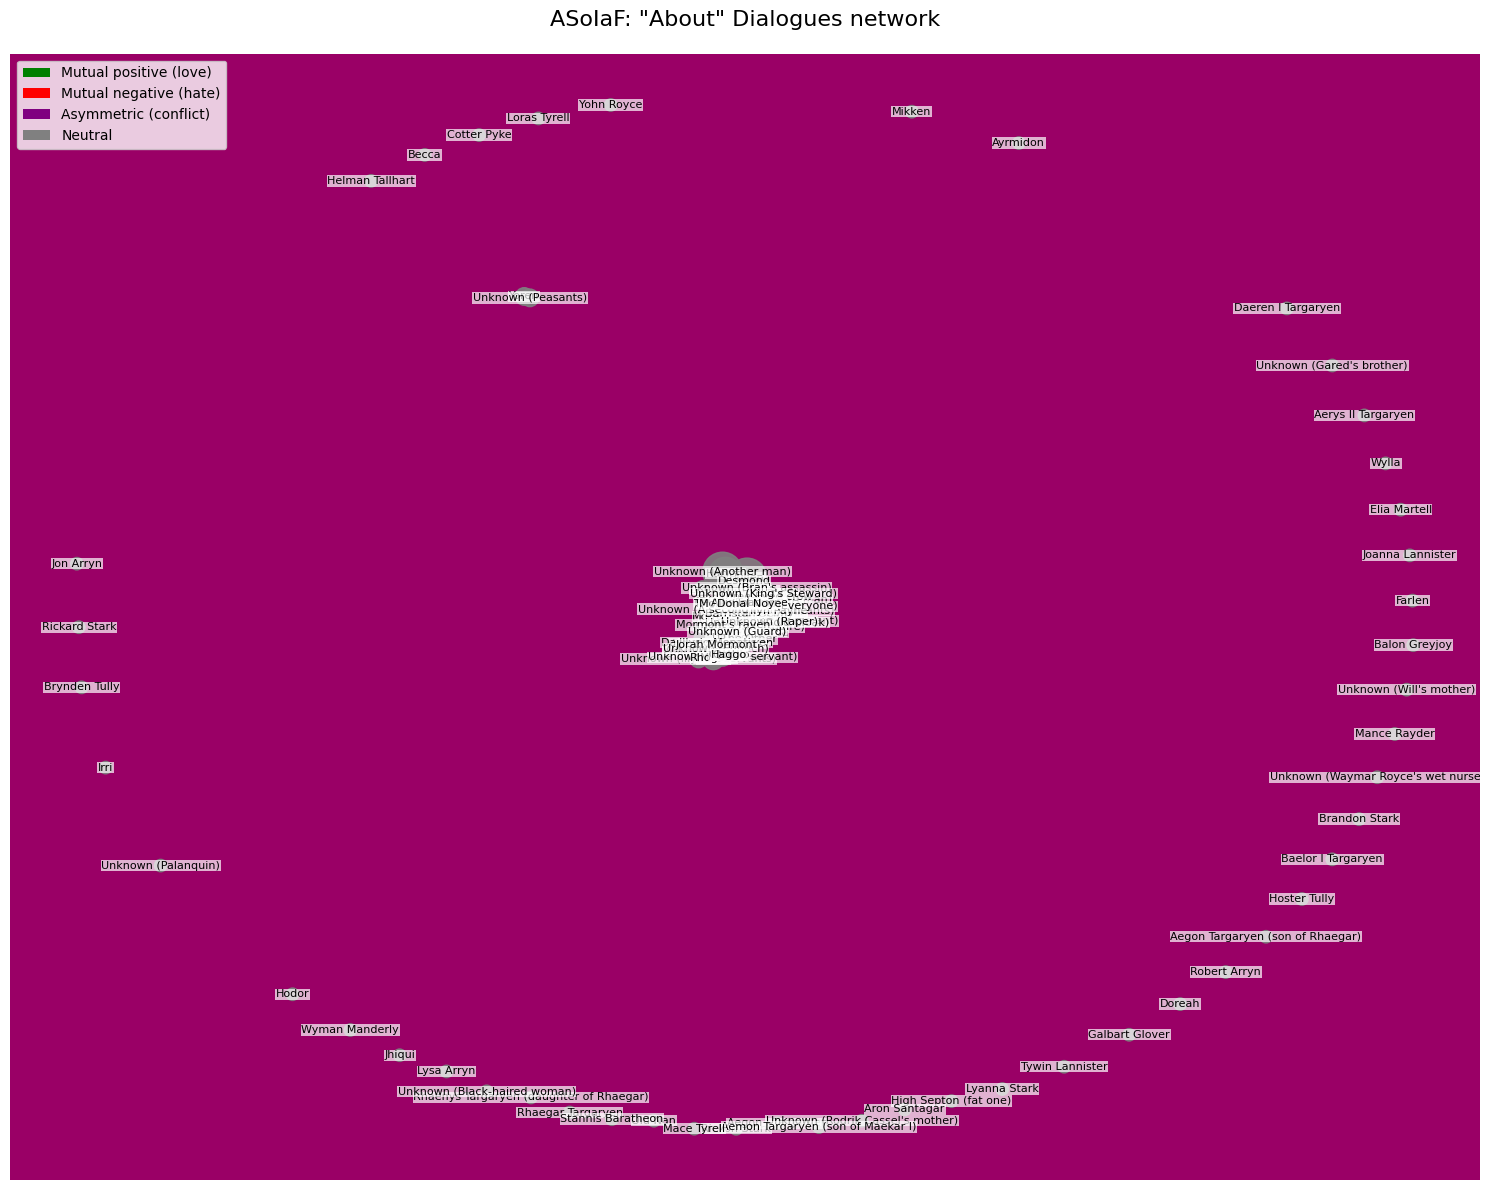

In [13]:
_ = draw_sentiment_network(
    G, 
    relationship_data, 
    title="ASoIaF: \"About\" Dialogues network", 
    file_name="sentiment-direct-dialogues-network"
)

# Most loved and hated characters (with Bayesian average)

In [14]:
most_loved, most_hated = most_loved_hated(relationship_data, n=10)

print("=" * 60)
print("MOST LOVED CHARACTERS")
for i, loved in enumerate(most_loved):
    print(f"{i+1}. {loved['character']}: {loved['charisma']:.3f} on {loved['incoming_dialogues']} dialogues")

print("\n" + "=" * 60)
print("MOST HATED CHARACTERS")
for i, hated in enumerate(most_hated):
    print(f"{i+1}. {hated['character']}: {hated['charisma']:.3f} on {hated['incoming_dialogues']} dialogues")

MOST LOVED CHARACTERS
1. Daenerys Targaryen: 0.085 on 77 dialogues
2. Robert Baratheon: 0.076 on 115 dialogues
3. Viserys Targaryen: 0.049 on 32 dialogues
4. Catelyn Stark: 0.046 on 261 dialogues
5. Varys: 0.031 on 24 dialogues
6. Renly Baratheon: 0.027 on 15 dialogues
7. Luwin: 0.027 on 45 dialogues
8. Barristan Selmy: 0.027 on 8 dialogues
9. Rodrik Cassel: 0.026 on 45 dialogues
10. Petyr Baelish: 0.026 on 49 dialogues

MOST HATED CHARACTERS
1. Waymar Royce: -0.057 on 45 dialogues
2. Gared: -0.047 on 16 dialogues
3. Jon Snow: -0.047 on 226 dialogues
4. Will: -0.045 on 26 dialogues
5. Donal Noye: -0.033 on 18 dialogues
6. Theon Greyjoy: -0.026 on 40 dialogues
7. Benjen Stark: -0.026 on 29 dialogues
8. Jory Cassel: -0.021 on 18 dialogues
9. Jaime Lannister: -0.016 on 37 dialogues
10. Tyrion Lannister: -0.015 on 90 dialogues


In [15]:
AG = create_graph(path_name="data/dialogues.csv", edge_type="indirect")

Extracting dialogues from graph edges...
Extracted 1076 dialogues from graph
Analyzing sentiment for all dialogues...
Global average sentiment score (m): 0.0030
Confidence parameter (C): 2.80 (avg dialogues per pair)


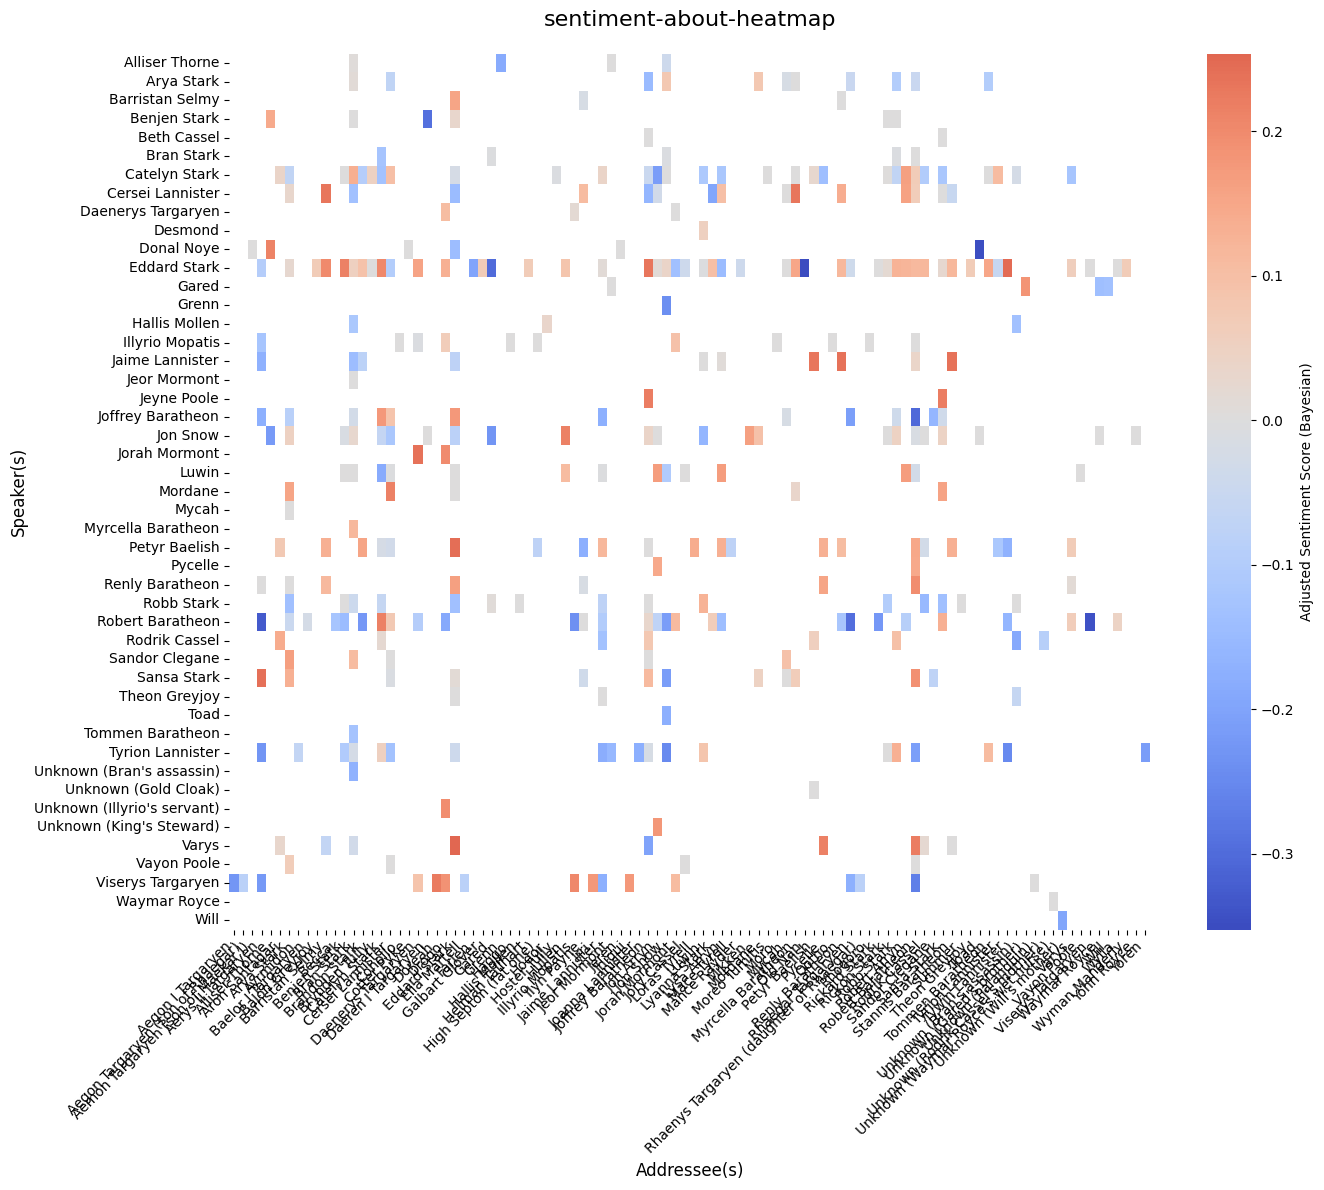

In [16]:
AG, about_dialogue_data, about_relationship_data = sentiment_heatmap(
    AG, 
    remove_empty=True, 
    title="sentiment-about-heatmap", 
    file_name="sentiment-about-heatmap"
)

C:\Users\longo\AppData\Roaming\Python\Python314\site-packages\networkx\drawing\nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


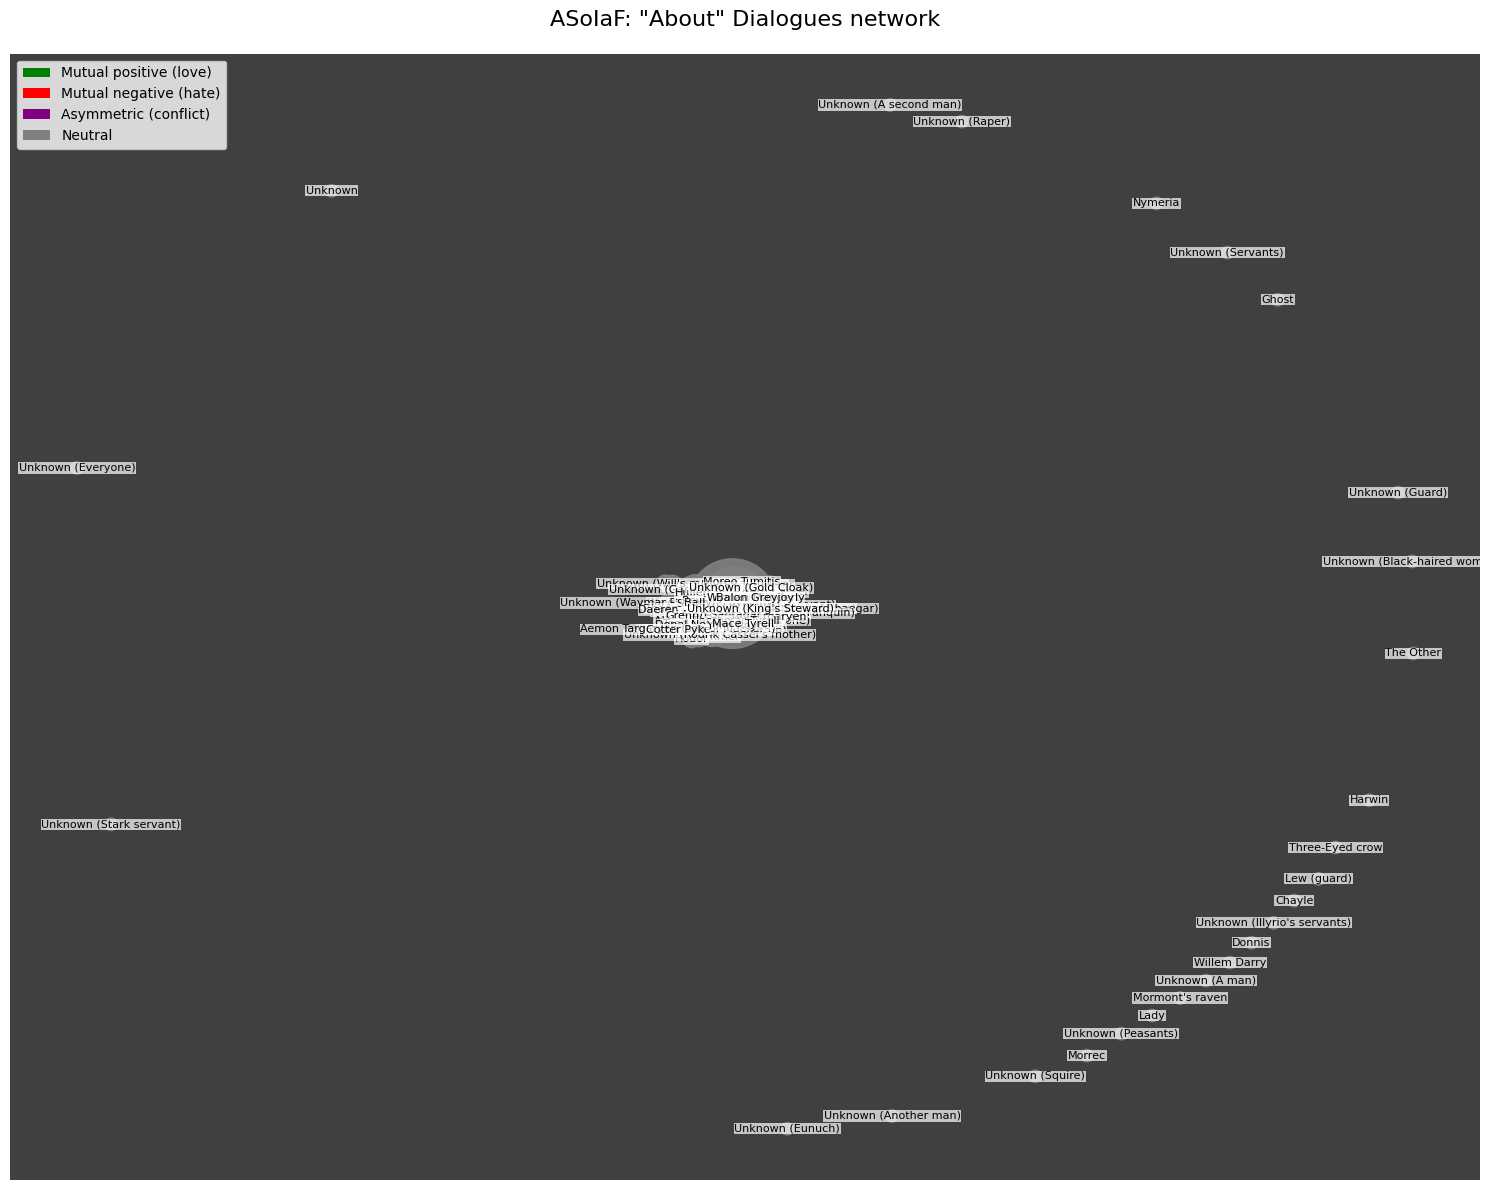

In [17]:
draw_sentiment_network(
    AG, 
    relationship_data=about_relationship_data, 
    type="undirected", 
    title="ASoIaF: \"About\" Dialogues network", 
    file_name="sentiment-about-dialogues-network"
)

In [18]:
most_loved, most_hated = most_loved_hated(about_relationship_data, n=10)

print("=" * 60)
print("MOST LOVED CHARACTERS")
for i, loved in enumerate(most_loved):
    print(f"{i+1}. {loved['character']}: {loved['charisma']:.3f} on {loved['incoming_dialogues']} dialogues")

print("\n" + "=" * 60)
print("MOST HATED CHARACTERS")
for i, hated in enumerate(most_hated):
    print(f"{i+1}. {hated['character']}: {hated['charisma']:.3f} on {hated['incoming_dialogues']} dialogues")

MOST LOVED CHARACTERS
1. Drogo: 0.079 on 32 dialogues
2. Illyrio Mopatis: 0.065 on 11 dialogues
3. Robert Baratheon: 0.049 on 84 dialogues
4. Renly Baratheon: 0.048 on 9 dialogues
5. Catelyn Stark: 0.048 on 34 dialogues
6. Doreah: 0.048 on 3 dialogues
7. Lyanna Stark: 0.044 on 20 dialogues
8. Myrcella Baratheon: 0.044 on 12 dialogues
9. Robb Stark: 0.042 on 31 dialogues
10. Stannis Baratheon: 0.039 on 6 dialogues

MOST HATED CHARACTERS
1. Rhaegar Targaryen: -0.086 on 9 dialogues
2. Aerys II Targaryen: -0.080 on 16 dialogues
3. Gared: -0.066 on 11 dialogues
4. Old Nan: -0.057 on 2 dialogues
5. Lysa Arryn: -0.056 on 29 dialogues
6. Jon Snow: -0.056 on 30 dialogues
7. Tywin Lannister: -0.052 on 10 dialogues
8. Toad: -0.052 on 3 dialogues
9. Viserys Targaryen: -0.047 on 4 dialogues
10. Unknown (Bran's assassin): -0.047 on 18 dialogues


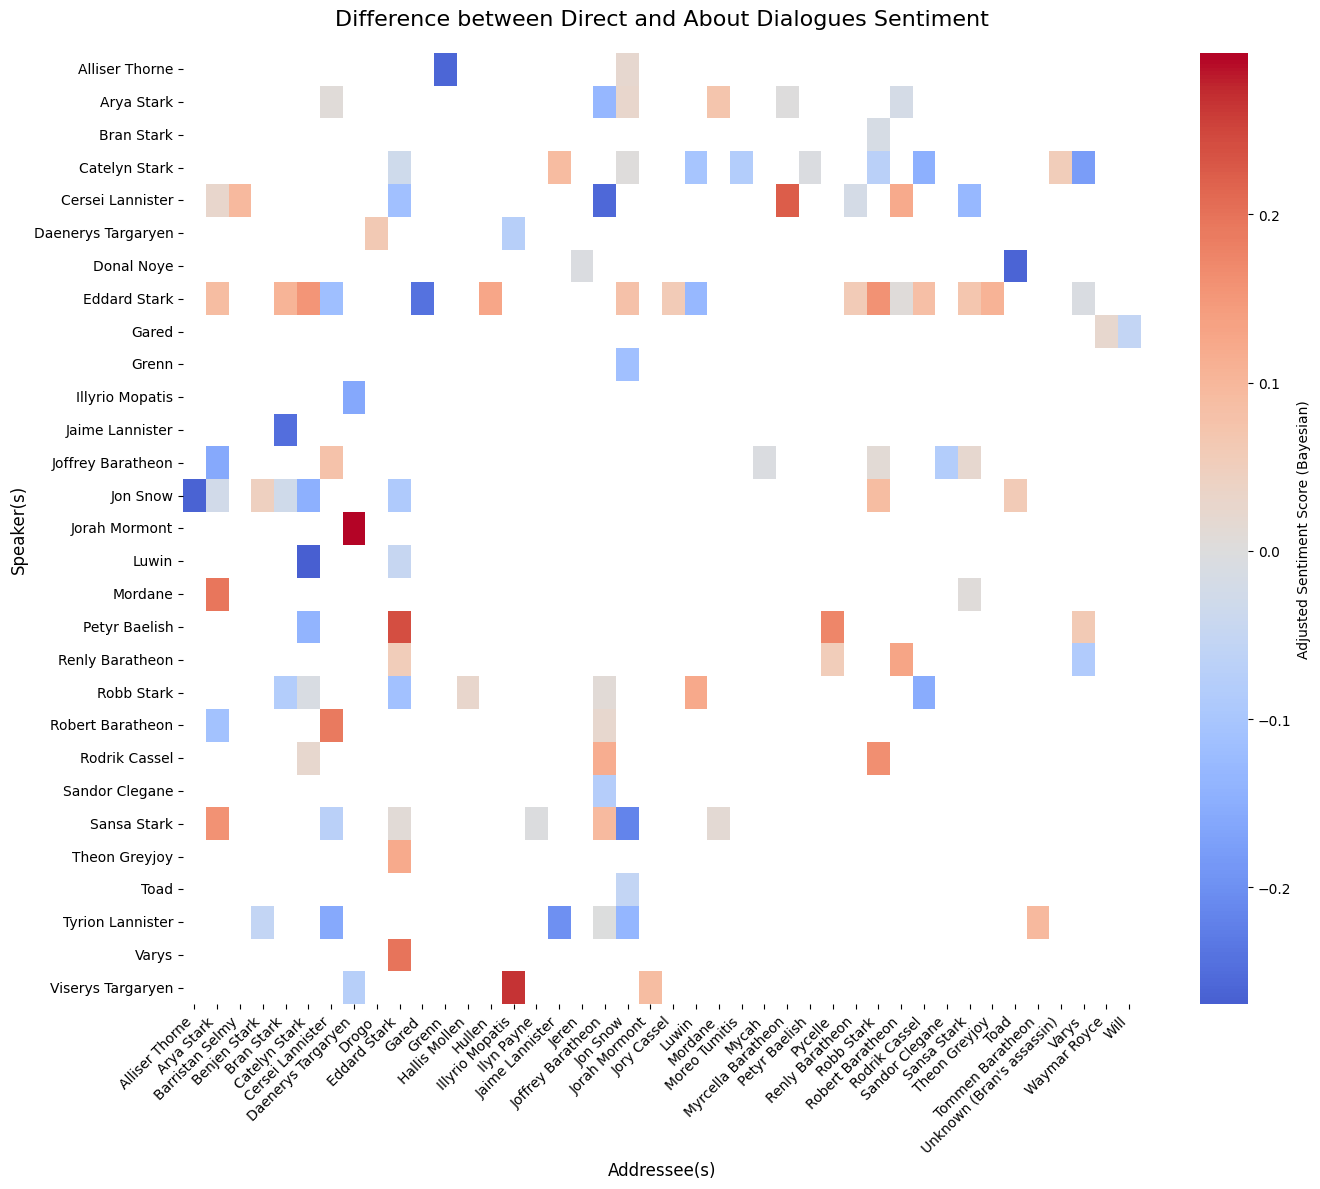

In [19]:
import numpy as np

# compute the element-wise difference between the two relationship_data dicts of dict:
difference_matrix = []
all_characters = []

for speaker in relationship_data:
    difference_matrix.append([])
    all_characters.append(speaker)
    for target in relationship_data[speaker]:
        # Safely get values using .get() to handle missing keys
        about_item = about_relationship_data.get(speaker, {}).get(target)
        direct_item = relationship_data[speaker][target]
        
        a = about_item['adjusted_sentiment'] if about_item is not None else None
        b = direct_item['adjusted_sentiment'] if direct_item is not None else None
        
        difference_matrix[-1].append(np.nan if a is None or b is None else a - b)

# Convert list of lists to numpy array
difference_matrix = np.array(difference_matrix)

difference_matrix, col_characters, row_characters = plot_heatmap(
    difference_matrix, 
    all_characters, 
    remove_empty=True,
    title="Difference between Direct and About Dialogues Sentiment",
    file_name="sentiment-difference-heatmap"
)

In [20]:
G = create_graph_from_matrix(difference_matrix, row_characters, col_characters)
draw_network(
    G, 
    color_parameter='sentiment', 
    title="Difference between Direct and About Dialogues Sentiment", 
    file_name="sentiment-difference-network"
)

UnboundLocalError: cannot access local variable 'degrees' where it is not associated with a value

<Figure size 1500x1200 with 0 Axes>

# Community detection

In [ ]:
# Community detection (Maja)
# Backbone detection

# Community Detection Analysis - Game of Thrones Dialogues
# Using Louvain Method for detecting character communities

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import lib.community as comm
import lib.tf_idf as tfidf

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
# 1. CREATE THE GRAPH (if you haven't already)
G = create_graph(path_name='data/dialogues.csv', edge_type='direct')
all_dialogues = pd.read_csv('data/dialogues.csv')

In [ ]:
# 2. COMMUNITY DETECTION USING LOUVAIN METHOD
G, partition, modularity = comm.detect_communities(G)

In [ ]:
# 3. ANALYZE COMMUNITY COMPOSITION
community_info = comm.analyze_communities(partition, G)

In [ ]:
# 4. VISUALIZE COMMUNITIES
comm.visualize_communities(
    G, 
    partition, 
    title="Character Communities in Game of Thrones",
    file_name="communities-network",
    modularity=modularity
)

In [ ]:
# 4.a VISUALIZE EACH COMMUNITY SEPARATELY IN A GRID (2 columns)
comm.visualize_communities_separately_grid(
    G, 
    partition, 
    n_cols=2,
    title="Community Details - All Communities",
    file_name="communities-networks"
)

In [ ]:
# 4.b VISUALIZE ONLY MAJOR CHARACTERS (Top N by Degree)
comm.visualize_major_characters(
    G, 
    partition, 
    top_n=30,
    title="Top 30 Most Connected Characters",
    file_name="top-30-characters-network"
)

In [ ]:
# 4.c COMMUNITY OVERVIEW GRID (Alternative Compact View)
comm.visualize_communities_grid(
    G, 
    partition, 
    n_cols=3,
    title="All Communities - Overview Grid",
    file_name="all-communities-overview-grid"
)

In [ ]:
# 5. COMMUNITY INTERACTION MATRIX (with meaningful names)
comm.plot_community_interaction_matrix_named(
    G, 
    partition,
    title="Inter-Community Interaction Strength",
    file_name="inter-community-confusion-matrix"
)

In [ ]:
# 6. TF-IDF ANALYSIS OF DIALOGUE BY COMMUNITY
community_texts = tfidf.extract_community_dialogues(all_dialogues, partition)

In [ ]:
# 7. COMPUTE TF-IDF SCORES
community_tfidf = tfidf.compute_community_tfidf(community_texts, max_features=20)

# Display results
print("="*70)
print("TOP TF-IDF TERMS BY COMMUNITY")
print("="*70)

for comm_id in sorted(community_tfidf.keys()):
    print(f"\n{'='*70}")
    print(f"COMMUNITY {comm_id}")
    print(f"{'='*70}")
    
    for rank, (term, score) in enumerate(community_tfidf[comm_id][:15], 1):
        print(f"  {rank:2d}. {term:<25} {score:.4f}")

In [ ]:
# 8. VISUALIZE TF-IDF WITH WORD CLOUDS
tfidf.create_community_wordclouds(
    community_tfidf, 
    partition,
    title="Community Characteristic Terms (TF-IDF)",
    file_name="community-characteristic-terms-tfidf"
)

In [ ]:
# 9. SUMMARY STATISTICS
comm.print_summary_statistics(partition, modularity, G)